In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_4 = np.loadtxt('class4_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_4_val = np.loadtxt('class4_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')
X_4_test = np.loadtxt('class4_test.txt')

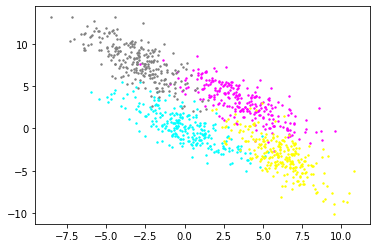

In [3]:
# simply visualising data
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
plt.scatter(X_4[:, 0], X_4[:, 1], color = 'grey', s = 2)

In [4]:
# find parameters
u_1 = np.mean(X_1, axis = 0)
u_2 = np.mean(X_2, axis = 0)
u_3 = np.mean(X_3, axis = 0)
u_4 = np.mean(X_4, axis = 0)
s_1 = np.cov(X_1.T)
s_2 = np.cov(X_2.T)
s_3 = np.cov(X_3.T)
s_4 = np.cov(X_4.T)
pc_1 = X_1.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])
pc_2 = X_2.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])
pc_3 = X_3.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])
pc_4 = X_4.shape[0]/(X_1.shape[0]+X_2.shape[0]+X_3.shape[0]+X_4.shape[0])

In [8]:
# define functions g1, g2, g3

W11 = -(1/2)*np.linalg.pinv(s_1)
w11 = np.dot(np.linalg.pinv(s_1), u_1)
w10 = -(1/2)*np.dot(np.dot(u_1.T, np.linalg.pinv(s_1)), u_1)-(1/2)*np.log(np.linalg.det(s_1))+np.log(pc_1)

W21 = -(1/2)*np.linalg.pinv(s_2)
w21 = np.dot(np.linalg.pinv(s_2), u_2)
w20 = -(1/2)*np.dot(np.dot(u_2.T, np.linalg.pinv(s_2)), u_2)-(1/2)*np.log(np.linalg.det(s_2))+np.log(pc_2)

W31 = -(1/2)*np.linalg.pinv(s_3)
w31 = np.dot(np.linalg.pinv(s_3), u_3)
w30 = -(1/2)*np.dot(np.dot(u_3.T, np.linalg.pinv(s_3)), u_3)-(1/2)*np.log(np.linalg.det(s_3))+np.log(pc_3)

W41 = -(1/2)*np.linalg.pinv(s_4)
w41 = np.dot(np.linalg.pinv(s_4), u_4)
w40 = -(1/2)*np.dot(np.dot(u_4.T, np.linalg.pinv(s_4)), u_4)-(1/2)*np.log(np.linalg.det(s_4))+np.log(pc_4)

def g1(x):
    return np.dot(np.dot(np.transpose(x), W11), x)+np.dot(w11.T, x)+w10
def g2(x):
    return np.dot(np.dot(np.transpose(x), W21), x)+np.dot(w21.T, x)+w20
def g3(x):
    return np.dot(np.dot(np.transpose(x), W31), x)+np.dot(w31.T, x)+w30
def g4(x):
    return np.dot(np.dot(np.transpose(x), W41), x)+np.dot(w41.T, x)+w40

In [9]:
# classifier
def predict(x):
    return np.argmax([g1(x), g2(x), g3(x), g4(x)])

In [10]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((4, 4))
X = [X_1_test, X_2_test, X_3_test, X_4_test]
for i in range(4):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],['True 1', 'True 2', 'True 3', 'True 4'])

,True 1,True 2,True 3,True 4
Predicted 1,92.0,0.0,3.0,3.0
Predicted 2,0.0,92.0,5.0,1.0
Predicted 3,4.0,5.0,92.0,0.0
Predicted 4,4.0,3.0,0.0,96.0


In [11]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [92.0, 92.0, 92.0, 96.0], 'Mean Accuracy': 93.0}
{'Precision: ': [0.9387755102040817, 0.9387755102040817, 0.9108910891089109, 0.9320388349514563], 'Mean Precision': 0.9301202361171327}
{'Recall: ': [0.92, 0.92, 0.92, 0.96], 'Mean Recall': 0.93}
{'F_measure: ': [0.9292929292929293, 0.9292929292929293, 0.9154228855721394, 0.9458128078817734], 'Mean F_measure': 0.9299553880099427}


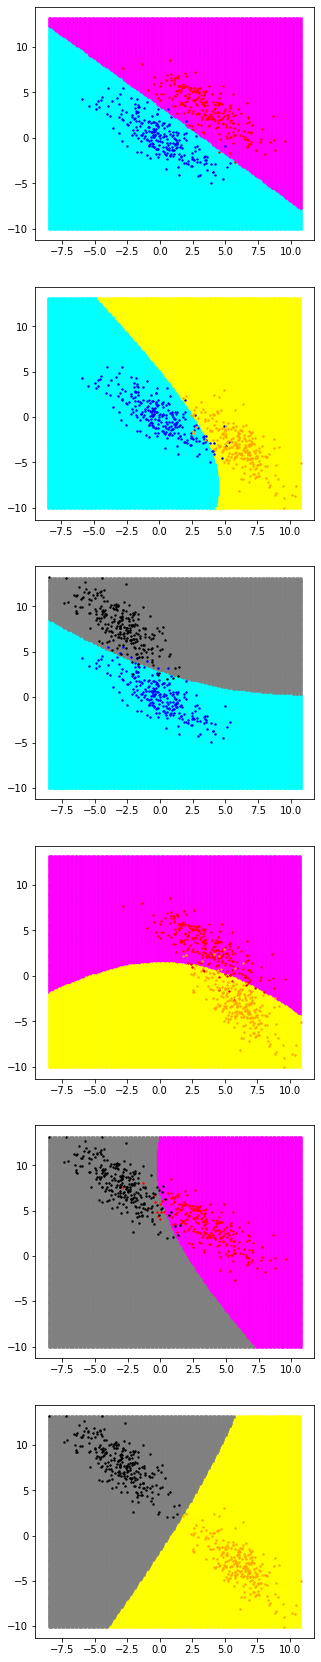

In [12]:
# decision region plot for every pair of classes with the respective training data superimposed
plt.rcParams['figure.figsize'] = [5, 30]
fig, axs = plt.subplots(6, 1)
x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0]), min(X_4[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1]), max(X_4[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0]), min(X_4[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1]), max(X_4[:, 1])])

# class 1 v class 2
x_1 = []
x_2 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g1([x, y]), g2([x, y])])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
axs[0].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[0].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[0].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[0].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)

# class 1 v class 3
x_1 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g1([x, y]), g3([x, y])])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_3 = np.array(x_3)
axs[1].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[1].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[1].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[1].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 1 v class 4
x_1 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g1([x, y]), g4([x, y])])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_4 = np.array(x_4)
axs[2].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[2].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[2].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[2].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)

# class 2 v class 3
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g2([x, y]), g3([x, y])])
        if c == 0:
            x_2.append([x, y])
        elif c == 1:
            x_3.append([x, y])
x_2 = np.array(x_2)
x_3 = np.array(x_3)
axs[3].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[3].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[3].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[3].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 2 v class 4
x_2 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g2([x, y]), g4([x, y])])
        if c == 0:
            x_2.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_2 = np.array(x_2)
x_4 = np.array(x_4)
axs[4].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[4].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[4].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[4].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)

# class 2 v class 4
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = np.argmax([g3([x, y]), g4([x, y])])
        if c == 0:
            x_3.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_3 = np.array(x_3)
x_4 = np.array(x_4)
axs[5].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[5].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[5].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)
axs[5].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)


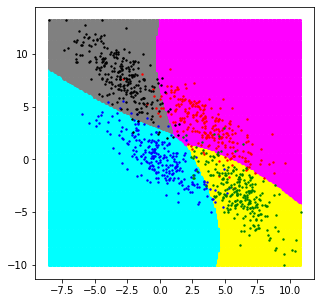

In [13]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = predict([x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        elif c == 2:
            x_3.append([x, y])
        else:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 4)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 4)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 4)
plt.scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 4)
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
plt.scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)